# Exploration de l'analyse des sentiments à l'aide des méthodes basées sur l'apprentissage automatique




## Introduction

##### Dataset :
--  sentiment140 dataset. 
-- Elle contient 160k tweets extraits à l'aide de l'API Twitter. Les tweets ont été annotés (0 = négatif, 1 = positif) et ils peuvent être utilisés pour détecter les sentiments.

#### Contenu du Dataset :

Elle contient 6 champs :

target: la polarité du tweet (0 = negative, 1 = positive)

ids: L'id du tweet ( 2087)

date: la date du tweet (Sat May 16 23:58:44 UTC 2009)

flag: La requête (lyx). S'il n'y a pas de requête, la valeur sera NO_QUERY

user: Nom de l’utilisateur qui a tweeté (robotickilldozr)

text: Le text du Tweet (Lyx is cool)

## Objectifs
-- calculer si les tweets sont positifs ou négatifs

-- Prédire le sentiment de ces tweets en utilisant SVM 

### - Lexicon based
L’approche à base de règles (ou l’approche à base de lexique) définit un ensemble de règles
qui identifie la subjectivité, la polarité ou le sujet d’un opinion.

## 1. importer les packages nécessaires

In [1]:
import pandas as pd
import collections
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 2. Loading Data ##

In [2]:

### Chargement des données


DATA = './data/'
trainData = DATA + 'sentiment140_160k_tweets_train.csv'


train = pd.read_csv(trainData)


train.head()

,target,ids,user,text
0,p,1978186076,ceruleanbreeze,"@nocturnalie Anyway, and now Abby and I share ..."
1,p,1994697891,enthusiasticjen,@JoeGigantino Few times I'm trying to leave co...
2,p,2191885992,LifeRemixed,@AngieGriffin Good Morning Angie I'll be in t...
3,p,1753662211,lovemandy,"had a good day driving up mountains, visiting ..."
4,p,2177442789,_LOVELYmanu,downloading some songs i love lady GaGa.


##### Compter le nombre du texte positif et négatif :

In [3]:
collections.Counter(train['target'])

Counter({'p': 80000, 'n': 79985})

#### Visualiser la distribution graphiquement :

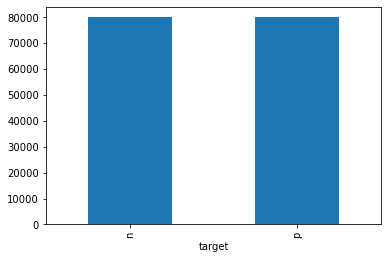

In [4]:
train.groupby('target').size().plot(kind='bar')

#### On remarque qu'il s'agit d'un ensemble de données relativement bien équilibré

## 3. Data (Text) Preprocessing 

#### Création du dictionnaire qui contient des mots avec opostrophes
#### Normalisation  et suppression des apostrophes

In [5]:
### mapping a dictionary of apostrophe words

appos = {
"aren't" : "are not",
"can't" : "cannot",
"cant" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"im" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"gg" : "going"
}

#### Utilisation du regex

- Supprimer les ponctuations
- transformer le texte en minuscule
- supprimer les espaces
- supprimer les caractères spéciaux, les emojis...
- supprimer les oppostrophes en utlisant le dictionnaire qu'on a définit précedemment



- On applique le preprocessing sur notre text et on ajoute un champs qui s appelle ugc qui contient un texte bien nettoyé

In [6]:
import re

def preprocess_text(sentence):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', sentence['text'])
    text = re.sub('@[^\s]+','', text)
    text = text.lower().split()
    reformed = [appos[word] if word in appos else word for word in text]
    reformed = " ".join(reformed) 
    text = re.sub('&[^\s]+;', '', reformed)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    #text = re.sub(' [\w] ', ' ', text)
    return text.strip()

preprocess = train.copy()
preprocess['ugc'] = preprocess.apply(preprocess_text, axis=1)

preprocess.head()

,target,ids,user,text,ugc
0,p,1978186076,ceruleanbreeze,"@nocturnalie Anyway, and now Abby and I share ...",anyway and now abby and i share all our crops ...
1,p,1994697891,enthusiasticjen,@JoeGigantino Few times I'm trying to leave co...,few times I am trying to leave comments in you...
2,p,2191885992,LifeRemixed,@AngieGriffin Good Morning Angie I'll be in t...,good morning angie I will be in the atl july 8...
3,p,1753662211,lovemandy,"had a good day driving up mountains, visiting ...",had a good day driving up mountains visiting k...
4,p,2177442789,_LOVELYmanu,downloading some songs i love lady GaGa.,downloading some songs i love lady gaga


## 4. Analyse des sentiments par une méthode basée sur l'apprentissage automatique : SVM linéaire

* Support Vector Machine (SVM) est un autre algorithme brillant dans l'apprentissage supervisé, c'est une sorte d'algorithme ML supervisé qui est utilisé pour la classification et l'analyse de régression des données, bien que SVM soit surtout utilisé pour la classification.

In [7]:
# Définir X et y à partir du dataset "preprocess" pour l'utiliser dans un COUNTVECTORIZER 
X = preprocess['ugc']
y = preprocess['target']

# diviser X and y en training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

print(x_train.shape)
print(x_test.shape)

(127988,)
(31997,)


#### Vectoriser les tweets à l'aide de CountVectorizer

* Vectoriser le dataset : Transformer les données se forme des données numériques
* Vectoriser les tweets pour la construction de modèle

*Exemple de CountVectorizer* :

In [9]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# l'initialisation de countvectorizer
vectorizer = CountVectorizer()

# Tokenize et transformer les documents en matrice document-term
document_term_matrix = vectorizer.fit_transform(documents)

# Vérifier le résultat
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


*Appliquer sur les tweets* :

In [12]:
# l'initialisation de countvectorizer
vectorizer = CountVectorizer(binary=True, stop_words='english')

# Apprendre un dictionnaire de vocabulaire de tous les jetons dans les documents bruts
vectorizer.fit(list(x_train) + list(x_test))

# transformer les documents en matrice document-term
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Quel est le nombre de caractéristiques (features) dégagé ?
len(vectorizer.get_feature_names())

69215

#### Construction de modèle

In [13]:
# Créer un classifier SVC en utilisant un kernel linéaire
classifier = SVC(kernel='linear', random_state= 0) # Pour un ensemble de données linéairement séparable, on pourrait utiliser 
                                                   # la fonction de kernel linéaire et on met (kernel="linear")

# Entraîner le classifier
classifier.fit(x_train_vec, y_train)

SVC(kernel='linear', random_state=0)

#### Afficher le score de prédiction

In [14]:
y_pred = classifier.predict(x_test_vec)

# Afficher le score de précision
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred) * 100, '%')

Accuracy score for SVC is:  74.8538925524268 %


#### Afficher la matrice de confusion

In [15]:
# tableau pour décrire la performance de ce modèle de classification 
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[11608  3644]
 [ 4402 12343]]
